# Import Libraries, Modules & Data

In [1]:
%%time

#Wranglers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from glob import glob

#Setting
%config Completer.use_jedi = False
warnings.filterwarnings("ignore")

Wall time: 3.28 s


In [2]:
%%time

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, RepeatedStratifiedKFold
from scipy.stats import randint, uniform
from sklearn.metrics import log_loss

cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=2, random_state=57)

Wall time: 1.3 s


In [3]:
sub, test, train = [ pd.read_csv(_) for _ in glob("..\\DATA\\*") if "csv" in _ ]

print(f"{train.shape = }")
print(f"{test.shape  = }")
print(f"{sub.shape   = }")

train.shape = (17996, 17)
test.shape  = (7713, 16)
sub.shape   = (7713, 11)


In [4]:
train.sample(10)

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
11015,Papa Roach,Between Angels And Insects,66.0,0.519,0.961,2.0,-3.214,0,0.0642,0.000207,0.000419,0.1950,0.344,93.466,234467.00000,4,8
12375,Kill The Lights,Battery,33.0,0.175,0.972,1.0,-6.033,1,0.1370,0.000022,0.280000,0.0828,0.141,195.084,310547.00000,4,8
10366,SWARM,Make It Out Alive,36.0,0.378,0.988,6.0,-2.863,1,0.3100,0.016700,0.000016,0.1030,0.227,95.206,202105.00000,4,8
15039,Russell Dickerson,Blue Tacoma,18.0,0.455,0.897,9.0,-4.879,1,0.0403,0.018300,NaN,0.1740,0.728,160.139,3.53445,4,4
10236,WagakkiBand,Starlight,47.0,0.646,0.913,10.0,-2.811,1,0.0376,0.020600,0.000001,0.1400,0.662,119.996,272467.00000,4,10
12901,Omer Adam,◊°◊ï◊§◊® ◊¢◊ï◊ì ◊ô◊ï◊ù,31.0,0.610,0.458,8.0,-6.963,0,0.0460,0.829000,NaN,0.3590,0.462,135.883,240000.00000,4,9
7979,Rendez Vous,Sentimental Animal,39.0,0.467,0.769,2.0,-5.059,1,0.0393,0.000039,0.572000,0.3200,0.607,155.957,275391.00000,4,6
13203,Dennis Lloyd,Like A Stone (feat. Tom Morello) - Recorded at...,50.0,0.356,0.205,9.0,-7.617,0,0.0304,0.756000,NaN,0.0916,0.177,107.057,259189.00000,4,10
6212,Linkin Park,Numb,82.0,0.496,0.863,9.0,-4.153,1,0.0381,0.004600,NaN,0.6390,0.243,110.018,185587.00000,4,10
1108,Yehuda Poliker,◊î◊ê◊ï◊® ◊ë◊ß◊¶◊î,35.0,0.626,0.483,6.0,-9.458,0,0.0298,0.499000,0.000017,0.2020,0.461,110.971,248300.00000,3,10


In [5]:
train.columns = train.columns.str.replace(" ", "_")
test.columns  = test.columns.str.replace(" ", "_")


_ = pd.Series(sub.columns).str.split("_").apply(lambda x: x[0]).values
gerne_dict = { num:(name + "_" + str(num)) for num,name in enumerate(_) }

train["Class_names"] = train.Class.map(gerne_dict)

gerne_dict

{0: 'Acoustic/Folk_0',
 1: 'Alt_1',
 2: 'Blues_2',
 3: 'Bollywood_3',
 4: 'Country_4',
 5: 'HipHop_5',
 6: 'Indie Alt_6',
 7: 'Instrumental_7',
 8: 'Metal_8',
 9: 'Pop_9',
 10: 'Rock_10'}

In [6]:
train.sample(10)

,Artist_Name,Track_Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in_min/ms,time_signature,Class,Class_names
3040,Joey Alexander,Tis Our Prayer,45.0,0.350,0.215,8.0,-14.659,1,0.0374,0.93300,0.911000,0.1260,0.135,99.903,4.144450,4,7,Instrumental_7
5328,Iron Maiden,Bring Your Daughter... to the Slaughter - 2015...,49.0,0.281,0.916,9.0,-4.676,1,0.0655,0.02820,0.000003,0.1570,0.532,146.645,283693.000000,4,8,Metal_8
17539,Kraftwerk,The Model - 2009 Remaster,60.0,0.708,0.683,4.0,-7.768,0,0.0344,0.00122,0.643000,0.1210,0.463,123.602,220533.000000,4,1,Alt_1
1384,Blue Öyster Cult,(Don't Fear) The Reaper,75.0,0.333,0.927,9.0,-8.550,0,0.0733,0.00290,0.000208,0.2970,0.385,141.466,5.135333,4,10,Rock_10
652,Rexx Life Raj,Aura (feat. Kojey Radical),48.0,0.731,0.693,1.0,-7.372,0,0.0893,0.60300,0.067700,0.1110,0.798,161.991,203033.000000,4,5,HipHop_5
2163,Sudha Malhotra,Mil Gaye Nain,1.0,0.554,0.367,1.0,-11.983,1,0.0382,0.84800,0.000177,0.0862,0.945,144.563,2.588667,4,3,Bollywood_3
15525,Be Careful,Epifuana,36.0,0.578,0.396,5.0,-14.602,0,0.1330,0.04360,0.826000,0.1160,0.605,170.008,187200.000000,4,6,Indie Alt_6
16999,Westlife,Fool Again,11.0,0.532,0.526,4.0,-6.812,1,0.0292,0.04680,NaN,0.0530,0.536,75.996,3.917783,4,9,Pop_9
1040,Sea Girls,Ready For More,45.0,0.481,0.856,1.0,-5.733,1,0.0331,0.02230,0.000023,0.2750,0.564,97.515,207373.000000,4,6,Indie Alt_6
3369,Trinidad Cardona,Dinero,88.0,0.708,0.782,2.0,-4.687,1,0.0674,0.00772,NaN,0.1070,0.484,119.997,2.681333,4,9,Pop_9


In [7]:
train.Class_names.value_counts()

Rock_10            4949
Indie Alt_6        2587
Pop_9              2524
Metal_8            1854
HipHop_5           1447
Alt_1              1373
Blues_2            1272
Acoustic/Folk_0     625
Instrumental_7      576
Bollywood_3         402
Country_4           387
Name: Class_names, dtype: int64

In [8]:
train.Class_names.value_counts(normalize=True).round(4) * 100

Rock_10            27.50
Indie Alt_6        14.38
Pop_9              14.03
Metal_8            10.30
HipHop_5            8.04
Alt_1               7.63
Blues_2             7.07
Acoustic/Folk_0     3.47
Instrumental_7      3.20
Bollywood_3         2.23
Country_4           2.15
Name: Class_names, dtype: float64

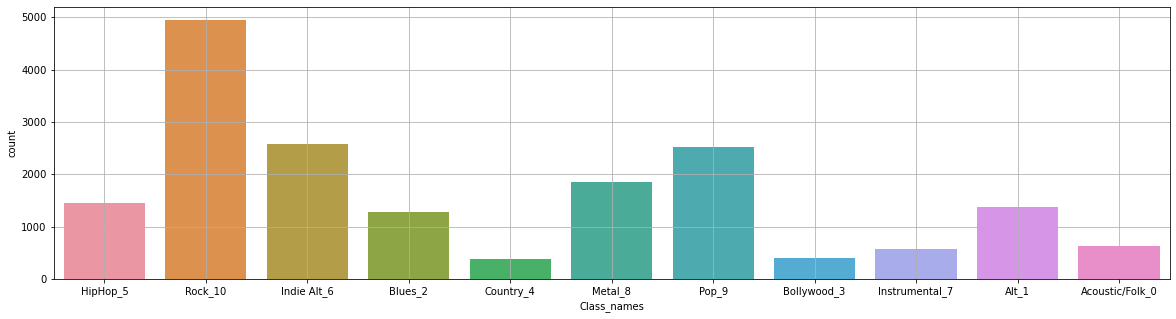

In [9]:
_, ax = plt.subplots(1,1, figsize=(20,5))
sns.countplot(train.Class_names, ax=ax)
ax.grid()

In [10]:
X_train = train.drop(labels=["Artist_Name", "Track_Name", "Class", "Class_names"], axis=1)
y_train = train.Class

X_test  = test.drop(labels=["Artist_Name", "Track_Name"], axis=1)

In [11]:
X_train.isna().sum()

Popularity             428
danceability             0
energy                   0
key                   2014
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      4377
liveness                 0
valence                  0
tempo                    0
duration_in_min/ms       0
time_signature           0
dtype: int64

In [12]:
(X_train.isna().sum() * 100 / X_train.shape[0]).round(2).loc[ (X_train.isna().sum() * 100 / X_train.shape[0]).round(2) > 0 ]

Popularity           2.38
key                 11.19
instrumentalness    24.32
dtype: float64

<AxesSubplot:>

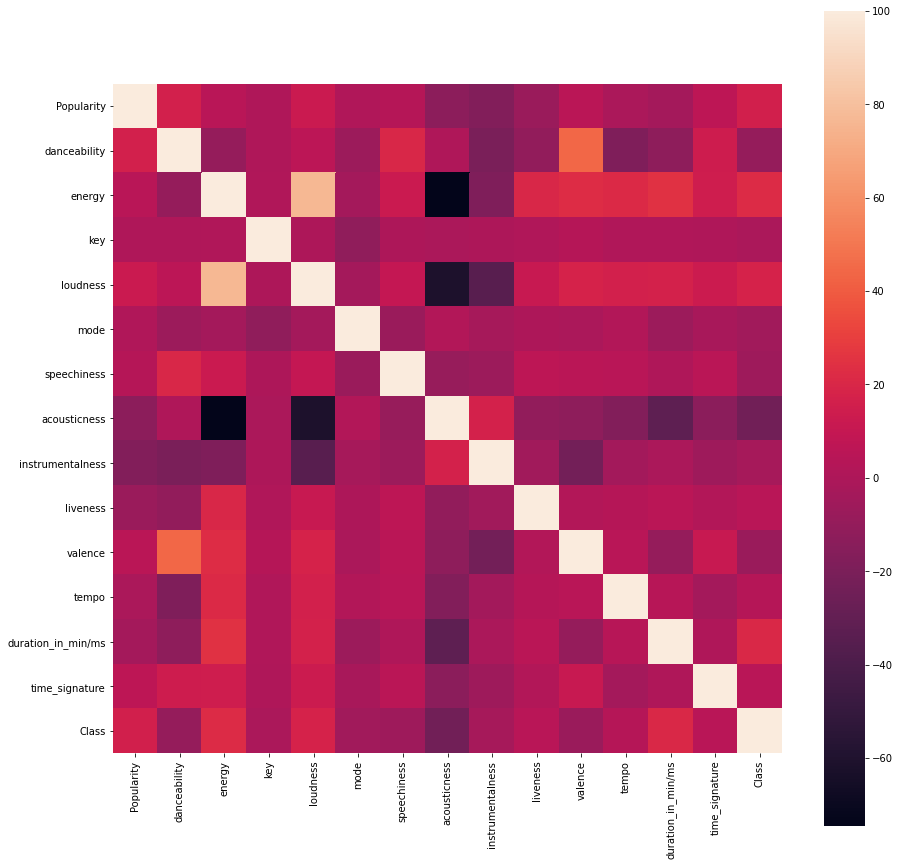

In [13]:
_, ax = plt.subplots(1,1, figsize=(15,15))
sns.heatmap( train.corr()* 100 , square=True, ax=ax)

In [14]:
X_train.describe()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in_min/ms,time_signature
count,17568.000000,17996.000000,17996.000000,15982.000000,17996.000000,17996.000000,17996.000000,17996.000000,13619.000000,17996.000000,17996.000000,17996.000000,1.799600e+04,17996.000000
mean,44.512124,0.543433,0.662777,5.952447,-7.910660,0.636753,0.079707,0.247082,0.177562,0.196170,0.486208,122.623294,2.007445e+05,3.924039
std,17.426928,0.166268,0.235373,3.196854,4.049151,0.480949,0.083576,0.310632,0.304048,0.159212,0.240195,29.571527,1.119891e+05,0.361618
min,1.000000,0.059600,0.000020,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.018300,30.557000,5.016500e-01,1.000000
25%,33.000000,0.432000,0.509000,3.000000,-9.538000,0.000000,0.034800,0.004300,0.000089,0.097500,0.297000,99.620750,1.663370e+05,4.000000
50%,44.000000,0.545000,0.700000,6.000000,-7.016000,1.000000,0.047400,0.081400,0.003910,0.129000,0.481000,120.065500,2.091600e+05,4.000000
75%,56.000000,0.659000,0.860000,9.000000,-5.189000,1.000000,0.083000,0.434000,0.200000,0.258000,0.672000,141.969250,2.524900e+05,4.000000
max,100.000000,0.989000,1.000000,11.000000,1.355000,1.000000,0.955000,0.996000,0.996000,1.000000,0.986000,217.416000,1.477187e+06,5.000000


In [15]:
train.corr(method='pearson').loc[:, "instrumentalness"].abs().sort_values(ascending=False)

instrumentalness      1.000000
loudness              0.343672
valence               0.228144
danceability          0.200752
energy                0.180276
acousticness          0.174139
Popularity            0.167661
speechiness           0.067632
time_signature        0.061745
liveness              0.047189
tempo                 0.038586
mode                  0.026771
Class                 0.025343
duration_in_min/ms    0.004551
key                   0.001411
Name: instrumentalness, dtype: float64

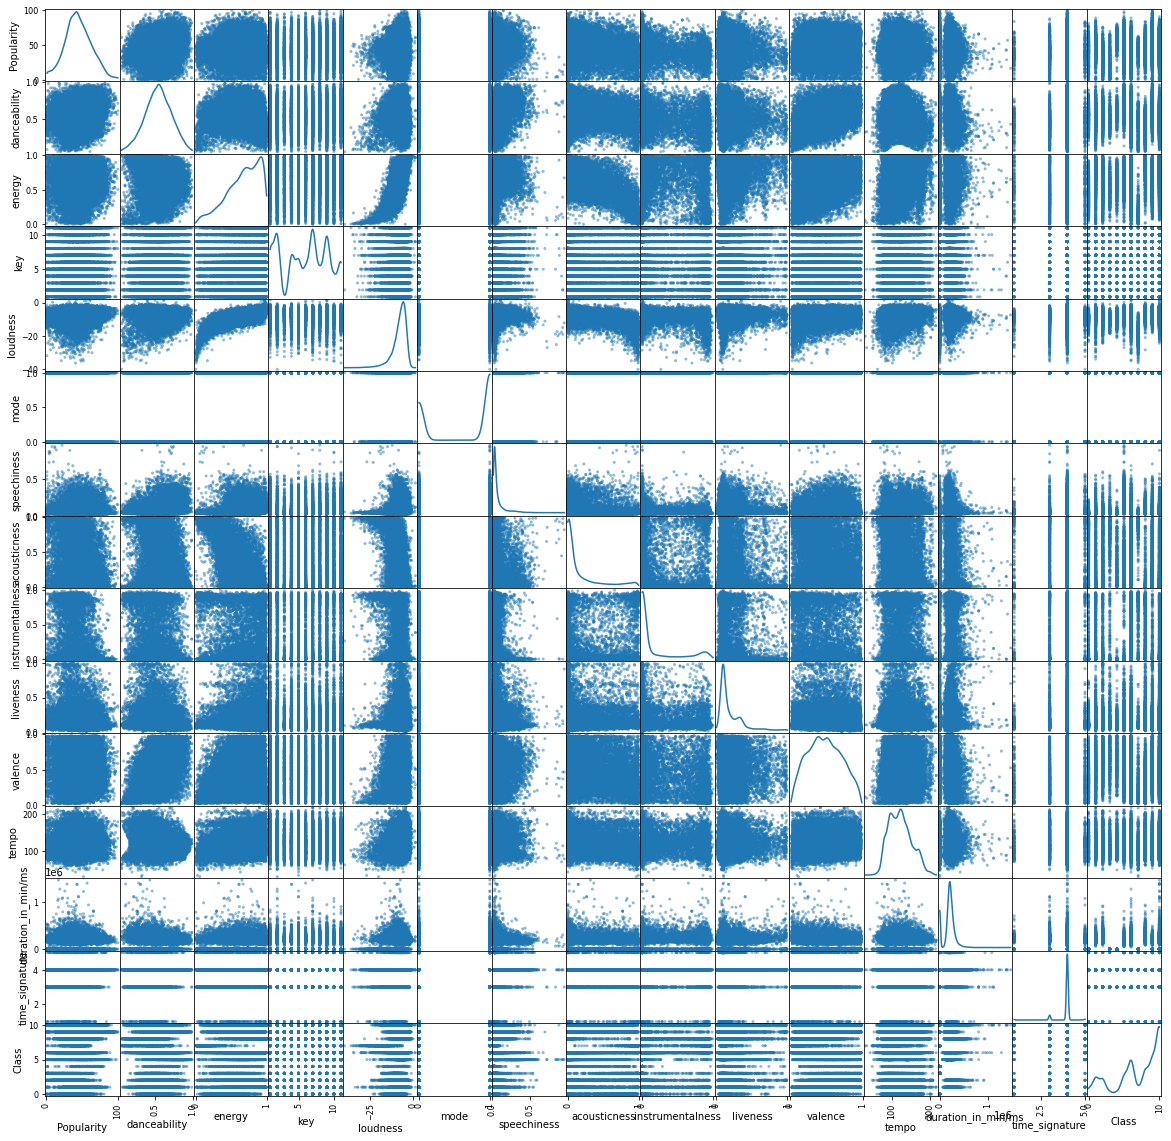

In [16]:
pd.plotting.scatter_matrix(train, figsize=(20,20), diagonal='kde')
plt.show()

In [17]:
train.describe()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in_min/ms,time_signature,Class
count,17568.000000,17996.000000,17996.000000,15982.000000,17996.000000,17996.000000,17996.000000,17996.000000,13619.000000,17996.000000,17996.000000,17996.000000,1.799600e+04,17996.000000,17996.000000
mean,44.512124,0.543433,0.662777,5.952447,-7.910660,0.636753,0.079707,0.247082,0.177562,0.196170,0.486208,122.623294,2.007445e+05,3.924039,6.695821
std,17.426928,0.166268,0.235373,3.196854,4.049151,0.480949,0.083576,0.310632,0.304048,0.159212,0.240195,29.571527,1.119891e+05,0.361618,3.206073
min,1.000000,0.059600,0.000020,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.018300,30.557000,5.016500e-01,1.000000,0.000000
25%,33.000000,0.432000,0.509000,3.000000,-9.538000,0.000000,0.034800,0.004300,0.000089,0.097500,0.297000,99.620750,1.663370e+05,4.000000,5.000000
50%,44.000000,0.545000,0.700000,6.000000,-7.016000,1.000000,0.047400,0.081400,0.003910,0.129000,0.481000,120.065500,2.091600e+05,4.000000,8.000000
75%,56.000000,0.659000,0.860000,9.000000,-5.189000,1.000000,0.083000,0.434000,0.200000,0.258000,0.672000,141.969250,2.524900e+05,4.000000,10.000000
max,100.000000,0.989000,1.000000,11.000000,1.355000,1.000000,0.955000,0.996000,0.996000,1.000000,0.986000,217.416000,1.477187e+06,5.000000,10.000000


In [18]:
from scipy.stats import skew, kurtosis
def compare_to_normal(column_data):
    fig, ax = plt.subplots(1,1, figsize=(20,5))
    sns.histplot(x=column_data, kde=True, ax=ax)
    plt.grid()
    Skew     = skew(column_data)
    Kurtosis = kurtosis(column_data)
    print(f"{ Skew     =}")
    print(f"{ Kurtosis =}")

 Skew     =-0.6611140008046469
 Kurtosis =-0.31718163059906335


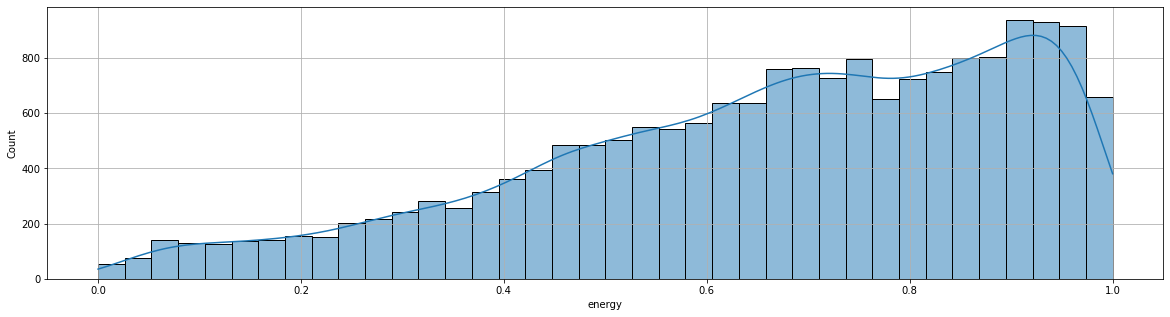

In [19]:
compare_to_normal(train.energy)

 Skew     =0.04913995853549625
 Kurtosis =-1.0661522914059836


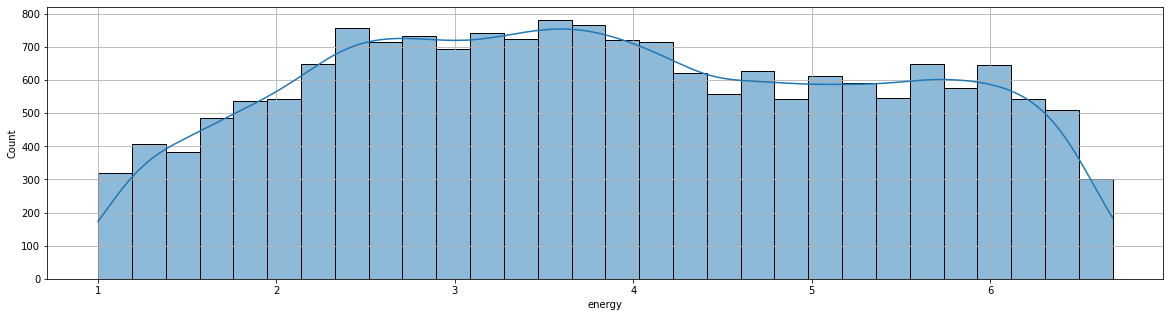

In [20]:
compare_to_normal(np.exp(train.energy*1.9))

## Calssification Un-Supervised M0dels

### K-Means
K-Means requires scaled inputs so by scaling

In [55]:
%%time

from sklearn.preprocessing import QuantileTransformer

qt = QuantileTransformer( output_distribution='normal', random_state=0 )

x_train = qt.fit_transform(X_train.dropna(axis=1))
x_test  = qt.transform(X_test.dropna(axis=1))

Wall time: 248 ms


In [56]:
from sklearn.cluster import KMeans, DBSCAN

km  = KMeans(n_clusters=10, init='k-means++', n_init=10, max_iter=300)

In [57]:
%%time

km.fit(x_train)

Wall time: 2.02 s


KMeans(n_clusters=10)

In [59]:
y_pred = km.predict(x_train)

In [60]:
from sklearn import metrics

In [93]:
cv_old = RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=57)

param_grid = {
    
    "n_clusters"   : np.arange(10, 22),
    "n_init"       : [10],
    "max_iter"     : [600],
    "tol"          : [0.00001],
    "verbose"      : [0],
    "random_state" : [101],
    
}

km_grid = GridSearchCV(
    
    KMeans(),
    param_grid,
    scoring = 'adjusted_mutual_info_score',
    n_jobs  = 2,
    cv      = cv_old,
    verbose = 1,
    
)

In [94]:
%%time

km_grid.fit(x_train, y_train)

Fitting 50 folds for each of 12 candidates, totalling 600 fits
Wall time: 17min 5s


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=57),
             estimator=KMeans(), n_jobs=2,
             param_grid={'max_iter': [600],
                         'n_clusters': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]),
                         'n_init': [10], 'random_state': [101], 'tol': [1e-05],
                         'verbose': [0]},
             scoring='adjusted_mutual_info_score', verbose=1)

In [95]:
pd.DataFrame(km_grid.cv_results_).sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_iter,param_n_clusters,param_n_init,param_random_state,param_tol,param_verbose,...,split43_test_score,split44_test_score,split45_test_score,split46_test_score,split47_test_score,split48_test_score,split49_test_score,mean_test_score,std_test_score,rank_test_score
2,2.629802,0.239451,0.023127,0.004005,600,12,10,101,0.00001,0,...,0.154192,0.162218,0.151843,0.161311,0.162544,0.167102,0.149547,0.157496,0.005663,1
3,2.857126,0.337279,0.024311,0.004190,600,13,10,101,0.00001,0,...,0.149283,0.159834,0.150856,0.167207,0.154754,0.158686,0.157222,0.155886,0.005316,2
0,2.132805,0.308835,0.021470,0.002504,600,10,10,101,0.00001,0,...,0.155918,0.153505,0.146930,0.158292,0.156539,0.162892,0.152713,0.155582,0.004216,3
5,3.213331,0.238162,0.024590,0.003810,600,15,10,101,0.00001,0,...,0.147036,0.161941,0.160663,0.147402,0.154104,0.155507,0.156867,0.155111,0.004676,4
4,2.916723,0.327266,0.024267,0.003950,600,14,10,101,0.00001,0,...,0.151032,0.160043,0.148173,0.156107,0.154469,0.163820,0.148280,0.154881,0.004931,5
1,2.288038,0.245964,0.022593,0.003538,600,11,10,101,0.00001,0,...,0.154489,0.156599,0.147712,0.159169,0.164875,0.161598,0.152424,0.154865,0.004595,6
11,4.619696,0.405057,0.026524,0.004716,600,21,10,101,0.00001,0,...,0.155380,0.162268,0.150038,0.152610,0.148321,0.162300,0.157814,0.154782,0.004685,7
7,3.703400,0.333143,0.025232,0.003699,600,17,10,101,0.00001,0,...,0.157427,0.156869,0.148502,0.154672,0.155725,0.161818,0.149774,0.154483,0.004292,8
6,3.452749,0.365200,0.024508,0.003950,600,16,10,101,0.00001,0,...,0.151718,0.165463,0.152904,0.156361,0.148607,0.153937,0.148469,0.154475,0.005412,9
9,4.360749,0.441803,0.025721,0.003020,600,19,10,101,0.00001,0,...,0.155476,0.163448,0.154366,0.156110,0.149971,0.160348,0.163562,0.154116,0.005694,10


In [100]:
X_train.isna().sum().loc[ X_train.isna().sum() > 0]

Popularity           428
key                 2014
instrumentalness    4377
dtype: int64

### KMeans

In [112]:
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer

pipe = Pipeline(
    [
        ("scaler",  QuantileTransformer(output_distribution='normal',random_state=101,)),
        ("impute", KNNImputer(n_neighbors=5, weights='uniform')),
        ("kmeans", KMeans(n_clusters=12, random_state=101,max_iter=300, tol=0.00001))
    ]
)

In [114]:
%%time

pipe.fit(X_train, y_train)

Wall time: 16.8 s


Pipeline(steps=[('scaler',
                 QuantileTransformer(output_distribution='normal',
                                     random_state=101)),
                ('impute', KNNImputer()),
                ('kmeans', KMeans(n_clusters=12, random_state=101, tol=1e-05))])

In [118]:
km_pipe_grid = {
    
    "scaler__output_distribution": [ 'normal', 'uniform'],
    "impute__n_neighbors"        : [5, 11, 17, 21],
    "impute__weights"            : ['uniform', 'distance']
}

km_pipe_Grid = GridSearchCV(
    pipe,
    km_pipe_grid,
    scoring = "adjusted_mutual_info_score",
    n_jobs  = -2,
    cv      = cv,
    verbose = 1,
)

In [119]:
%%time

km_pipe_Grid.fit(X_train, y_train)

Fitting 8 folds for each of 16 candidates, totalling 128 fits
Wall time: 14min 46s


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=2, n_splits=4, random_state=57),
             estimator=Pipeline(steps=[('scaler',
                                        QuantileTransformer(output_distribution='normal',
                                                            random_state=101)),
                                       ('impute', KNNImputer()),
                                       ('kmeans',
                                        KMeans(n_clusters=12, random_state=101,
                                               tol=1e-05))]),
             n_jobs=-2,
             param_grid={'impute__n_neighbors': [5, 11, 17, 21],
                         'impute__weights': ['uniform', 'distance'],
                         'scaler__output_distribution': ['normal', 'uniform']},
             scoring='adjusted_mutual_info_score', verbose=1)

In [120]:
pd.DataFrame(km_pipe_Grid.cv_results_).sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_impute__n_neighbors,param_impute__weights,param_scaler__output_distribution,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,mean_test_score,std_test_score,rank_test_score
11,15.640462,0.304016,3.892009,0.252450,17,distance,uniform,"{'impute__n_neighbors': 17, 'impute__weights':...",0.163120,0.158469,0.157362,0.159164,0.155659,0.163368,0.161103,0.154330,0.159072,0.003090,1
9,15.568812,0.336515,3.837607,0.248646,17,uniform,uniform,"{'impute__n_neighbors': 17, 'impute__weights':...",0.158022,0.158709,0.151463,0.157972,0.152914,0.162595,0.151553,0.155189,0.156052,0.003697,2
13,15.695589,0.473126,3.877137,0.164095,21,uniform,uniform,"{'impute__n_neighbors': 21, 'impute__weights':...",0.158889,0.152232,0.150657,0.158745,0.152363,0.155983,0.152773,0.160875,0.155315,0.003576,3
1,15.928681,0.451638,3.978153,0.169512,5,uniform,uniform,"{'impute__n_neighbors': 5, 'impute__weights': ...",0.160783,0.154794,0.157307,0.159940,0.147925,0.152090,0.149458,0.158851,0.155144,0.004570,4
3,16.056169,0.341898,3.765568,0.237540,5,distance,uniform,"{'impute__n_neighbors': 5, 'impute__weights': ...",0.159309,0.155663,0.151998,0.157085,0.148501,0.159139,0.154480,0.154874,0.155131,0.003389,5
7,16.322274,0.478883,4.335505,0.345651,11,distance,uniform,"{'impute__n_neighbors': 11, 'impute__weights':...",0.160291,0.151178,0.146036,0.156659,0.146214,0.160049,0.155696,0.164003,0.155016,0.006224,6
5,16.465872,0.581947,4.043372,0.224407,11,uniform,uniform,"{'impute__n_neighbors': 11, 'impute__weights':...",0.154819,0.150077,0.147612,0.146557,0.156432,0.161555,0.150861,0.171631,0.154943,0.007817,7
15,14.583591,1.622700,3.458546,0.725854,21,distance,uniform,"{'impute__n_neighbors': 21, 'impute__weights':...",0.169207,0.151085,0.144213,0.158137,0.150554,0.151958,0.155565,0.155025,0.154468,0.006805,8
0,15.782752,0.541784,4.022700,0.107467,5,uniform,normal,"{'impute__n_neighbors': 5, 'impute__weights': ...",0.123404,0.113143,0.114679,0.114195,0.116732,0.116135,0.117366,0.127235,0.117861,0.004595,9
10,14.882526,0.460253,3.862168,0.219607,17,distance,normal,"{'impute__n_neighbors': 17, 'impute__weights':...",0.123925,0.109742,0.116053,0.118626,0.115775,0.116098,0.119131,0.118680,0.117254,0.003764,10


In [122]:
km_pipe_Grid.best_params_

{'impute__n_neighbors': 17,
 'impute__weights': 'distance',
 'scaler__output_distribution': 'uniform'}

In [124]:
best_norm_imputer_pipe =  Pipeline(
    [
        ("scaler",  QuantileTransformer(output_distribution='uniform',random_state=101,)),
        ("impute", KNNImputer(n_neighbors=17, weights='distance')),
        ("kmeans", KMeans(n_clusters=12, random_state=101,max_iter=300, tol=0.00001))
    ]
)

In [127]:
km_pipe_grid = {
    'kmeans__n_clusters': [10,11,12,13],
}


final_km_grid = GridSearchCV(
    best_norm_imputer_pipe,
    km_pipe_grid,
    scoring = "adjusted_mutual_info_score",
    n_jobs  = -2,
    cv      = cv,
    verbose = 1,
)

In [128]:
%%time

final_km_grid.fit(X_train, y_train)

Fitting 8 folds for each of 4 candidates, totalling 32 fits
Wall time: 3min 48s


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=2, n_splits=4, random_state=57),
             estimator=Pipeline(steps=[('scaler',
                                        QuantileTransformer(random_state=101)),
                                       ('impute',
                                        KNNImputer(n_neighbors=17,
                                                   weights='distance')),
                                       ('kmeans',
                                        KMeans(n_clusters=12, random_state=101,
                                               tol=1e-05))]),
             n_jobs=-2, param_grid={'kmeans__n_clusters': [10, 11, 12, 13]},
             scoring='adjusted_mutual_info_score', verbose=1)

In [129]:
pd.DataFrame(final_km_grid.cv_results_).sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kmeans__n_clusters,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,mean_test_score,std_test_score,rank_test_score
2,15.614224,0.415712,4.037941,0.260077,12,{'kmeans__n_clusters': 12},0.163120,0.158469,0.157362,0.159164,0.155659,0.163368,0.161103,0.154330,0.159072,0.003090,1
3,14.652246,1.406739,3.518189,0.670241,13,{'kmeans__n_clusters': 13},0.162242,0.151816,0.155822,0.161275,0.156807,0.155107,0.155635,0.167254,0.158245,0.004640,2
1,15.515854,0.572854,3.852694,0.187593,11,{'kmeans__n_clusters': 11},0.163010,0.153380,0.154059,0.156507,0.149434,0.163439,0.154661,0.163749,0.157280,0.005090,3
0,15.454665,0.414481,3.856416,0.192052,10,{'kmeans__n_clusters': 10},0.163915,0.141858,0.155299,0.156190,0.142010,0.156868,0.157281,0.149741,0.152895,0.007275,4


### Best ***quantile_tranformer___knn_imputer__Kmeans*** Pipe Architecture

In [130]:
KM_Pipe =  Pipeline(
    
    [
        ("scaler",  QuantileTransformer(output_distribution='uniform',random_state=101,)),
        ("impute", KNNImputer(n_neighbors=17, weights='distance')),
        ("kmeans", KMeans(n_clusters=12, random_state=101,max_iter=300, tol=0.00001))
    ]
    
)

In [131]:
%%time

KM_Pipe.fit(X_train, y_train)

Wall time: 15.7 s


Pipeline(steps=[('scaler', QuantileTransformer(random_state=101)),
                ('impute', KNNImputer(n_neighbors=17, weights='distance')),
                ('kmeans', KMeans(n_clusters=12, random_state=101, tol=1e-05))])

In [132]:
%%time

KM_label_train = KM_Pipe.predict(X_train)
KM_label_test  = KM_Pipe.predict(X_test)

Wall time: 23.2 s


In [134]:
pd.Series(KM_label_train).value_counts()

0     1746
1     1699
8     1653
10    1621
2     1596
3     1517
9     1453
6     1441
11    1387
7     1351
5     1297
4     1235
dtype: int64

In [137]:
X_train["KM_Label"] = KM_label_train
X_test[ "KM_Label"]  = KM_label_test

# Strainght XGBoost

## Iteration-1 : Best Param
xgb_param_dict = {
    
    "n_estimators"     : 43, #The Third Iteration (39 & 38 Found To be Best Depth 5) (1st: 29 & 28 Found To be Best Depth 6)
    "max_depth"        : 5,  # Max Depth 5 Selected 
    "learning_rate"    : 0.275,
    "use_label_encoder": False,
    "n_jobs"           : 4,
    "random_state"     : 40,
    "verbosity"        : 1,
    
}

In [138]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold

In [139]:
%%time

xgb_param_dict = {
    
    "n_estimators"     : 43, #The Third Iteration (39 & 38 Found To be Best Depth 5) (1st: 29 & 28 Found To be Best Depth 6)
    "max_depth"        : 5,  # Max Depth 5 Selected 
    "learning_rate"    : 0.275,
    "use_label_encoder": False,
    "n_jobs"           : 4,
    "random_state"     : 40,
    "verbosity"        : 1,
    
}

xgb_model = XGBClassifier(**xgb_param_dict)

xgb_model.fit(X_train, y_train)

[12:21:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 13.7 s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.275, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=43, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=40, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=1)

In [140]:
y_pred = pd.DataFrame(xgb_model.predict_proba(X_test), index = X_test.index)

y_pred.columns = y_pred.columns.map(gerne_dict)

In [141]:
pd.Series(xgb_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)*100

duration_in_min/ms    16.518938
acousticness          11.859104
speechiness           10.519746
instrumentalness       9.219434
energy                 9.150527
danceability           7.638261
Popularity             6.082839
valence                6.025865
mode                   4.717990
time_signature         4.069763
loudness               3.948800
KM_Label               3.305974
tempo                  2.576342
liveness               2.548252
key                    1.818160
dtype: float32

In [142]:
y_pred

,Acoustic/Folk_0,Alt_1,Blues_2,Bollywood_3,Country_4,HipHop_5,Indie Alt_6,Instrumental_7,Metal_8,Pop_9,Rock_10
0,0.000173,0.052455,0.013666,0.000171,0.000173,0.009788,0.095421,0.000174,0.033707,0.023812,0.770460
1,0.000103,0.048858,0.005835,0.000102,0.000103,0.001270,0.056055,0.000104,0.716654,0.007419,0.163496
2,0.000128,0.034152,0.001227,0.000126,0.000128,0.036187,0.022248,0.000128,0.002389,0.708847,0.194440
3,0.000255,0.086177,0.002834,0.000252,0.000255,0.019944,0.064536,0.000256,0.019474,0.548595,0.257422
4,0.012962,0.001775,0.002628,0.002879,0.127909,0.001665,0.000869,0.000727,0.009109,0.785571,0.053906
...,...,...,...,...,...,...,...,...,...,...,...
7708,0.000194,0.016581,0.052519,0.000192,0.000194,0.186662,0.087164,0.000195,0.002868,0.601174,0.052257
7709,0.000243,0.100035,0.040781,0.000240,0.000243,0.005359,0.092589,0.000244,0.246894,0.013076,0.500296
7710,0.139372,0.003132,0.001938,0.025657,0.031684,0.017084,0.003622,0.001728,0.004094,0.435469,0.336219
7711,0.000200,0.150937,0.020393,0.000197,0.000199,0.014450,0.427951,0.000200,0.003799,0.114407,0.267268


## GSCV - First Optimization **n_estimators**: Target to Keep Model Light Weight

In [144]:
%%time

param_grid = {
    
    "n_estimators": range(10, 115, 5)
}

gscv_xgb = GridSearchCV(
    
    XGBClassifier(**xgb_param_dict),
    param_grid,
    scoring = 'neg_log_loss',
    n_jobs  = None,
    refit   = True,
    cv      = cv,
    verbose = 1,

)

Wall time: 0 ns


In [145]:
%%time

gscv_xgb.fit(X_train, y_train)

Fitting 8 folds for each of 30 candidates, totalling 240 fits
[12:22:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:22:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:22:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:2

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=2, n_splits=4, random_state=57),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.275, max_delta_step=None,
                                     max_depth=5, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=43, n_jobs=4,
                                     num_parallel_tree=None, random_state=40,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None

In [147]:
pd.DataFrame(gscv_xgb.cv_results_).sort_values(by="rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,mean_test_score,std_test_score,rank_test_score
17,9.005855,0.403253,0.051647,0.003141,42,{'n_estimators': 42},-1.213624,-1.192372,-1.198621,-1.199184,-1.190181,-1.206488,-1.189801,-1.199776,-1.198756,0.007718,1
16,8.709925,0.392840,0.046750,0.002639,41,{'n_estimators': 41},-1.213810,-1.192283,-1.198773,-1.199321,-1.190413,-1.207052,-1.189540,-1.199639,-1.198854,0.007850,2
18,10.435596,0.941759,0.059150,0.019118,43,{'n_estimators': 43},-1.213393,-1.192696,-1.198634,-1.199342,-1.189742,-1.207331,-1.189971,-1.200510,-1.198952,0.007795,3
15,8.535453,0.236205,0.051751,0.007635,40,{'n_estimators': 40},-1.213863,-1.192175,-1.199516,-1.199578,-1.190817,-1.206541,-1.189854,-1.199912,-1.199032,0.007717,4
19,9.693764,0.596086,0.054220,0.007100,44,{'n_estimators': 44},-1.213409,-1.193421,-1.198714,-1.199430,-1.189749,-1.207692,-1.189799,-1.200567,-1.199098,0.007804,5


## n_estimators: 42

## Grid Search For Learning Rate

### Random Search Best Learning Rate from 0.25 - 0.29

## Random Search For Best Roots (No Affect!!!!)

# Artist Names

In [28]:
train.Artist_Name.value_counts()

Backstreet Boys                   69
Westlife                          60
Britney Spears                    54
Eyal Golan                        48
Omer Adam                         48
                                  ..
Lockdown On Date Night Tuesday     1
Hugo Helmig                        1
Josiah and the Bonnevilles         1
The Doves                          1
Ryskinder                          1
Name: Artist_Name, Length: 9149, dtype: int64

In [29]:
train.Artist_Name.str.split(",").apply(lambda x : len(x))

0        1
1        1
2        1
3        1
4        1
        ..
17991    1
17992    1
17993    1
17994    1
17995    1
Name: Artist_Name, Length: 17996, dtype: int64

In [30]:
train.Artist_Name.loc[ train.Artist_Name.str.split(",").apply(lambda x : len(x)) == 2]

13                   Harald Lassen, Bram de Looze
75                      Britney Spears, will.i.am
211                    Kayla Nicole, Taylor Girlz
230                Luiz Bonfá, Panos Megarchiotis
315                       Mukesh, Lata Mangeshkar
                           ...                   
17766          Shreya Ghoshal, Soumyadeep Ghoshal
17768    Ragi Harbans Singh Jagadhari Wale, Party
17817                  Ilaiyaraaja, K. J. Yesudas
17852              Ballaké Sissoko, Vincent Ségal
17885                  Marshmello, Jonas Brothers
Name: Artist_Name, Length: 406, dtype: object

In [31]:
train.Artist_Name.str.split(",").apply( lambda x: x[0] ).value_counts()

Backstreet Boys        69
Britney Spears         64
Westlife               62
Lata Mangeshkar        52
Omer Adam              48
                       ..
Swedish House Mafia     1
Hank Mizell             1
Ormiston                1
Numl6ck                 1
Ryskinder               1
Name: Artist_Name, Length: 8871, dtype: int64

In [32]:
train["Artist_Name_New"] = train.Artist_Name.str.split(",").apply( lambda x: x[0] )

In [33]:
train.head()

,Artist_Name,Track_Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in_min/ms,time_signature,Class,Class_names,Artist_Name_New
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5,HipHop_5,Bruno Mars
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10,Rock_10,Boston
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6,Indie Alt_6,The Raincoats
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5,HipHop_5,Deno
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10,Rock_10,Red Hot Chili Peppers


In [34]:
list_of_one_timers = set( train.Artist_Name_New.value_counts().loc[ train.Artist_Name_New.value_counts() == 1 ].index )

In [35]:
def SplitDataFrame(DataFrame: pd.DataFrame):
    
    one_time_index = list(DataFrame.Artist_Name_New.apply( lambda ob: ob in  list_of_one_timers))
    one_time_index = train.loc[one_time_index].index
#     One_time_df    = DataFrame.loc[ one_time_index ]
    
    Not_OT_index   = list(DataFrame.Artist_Name_New.apply( lambda ob: ob not in  list_of_one_timers))
    Not_OT_index   = train.loc[Not_OT_index].index
#     Not_OT_df      = DataFrame.loc[ Not_OT_index ]
    return one_time_index, Not_OT_index


In [36]:
%%time

_, __ = SplitDataFrame( train )

Wall time: 34.5 ms


In [37]:
from collections import Counter


def check_member(counter, el):
    ret = counter.get(el)
    return ret if ret is not None else 0


def for_artist_name(artist_name, Data_Frame):
    arr = np.array([ check_member(Counter(Data_Frame.Class.loc[Data_Frame.Artist_Name_New == artist_name].values), _) for _ in range(11)])
    variety = (for_artist_name("Red Hot Chili Peppers", train) != 0).sum()
    return arr / arr.sum(), variety